# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np


# LOADING DATASET

* Here our main aim is to find the significant variable which is predicting price.
* How well those variables describe the price of the car

In [2]:
df = pd.read_csv(r"C:\Users\Zoe\AppData\Local\Temp\Temp1_archive (2).zip\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# CHECKING MISSING VALUES

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#replacing carname to comapany name for better understanding
df.rename(columns= {'CarName': 'companyname'}, inplace = True)


In [5]:
df.head() #SYMBOLING, companyname, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

<AxesSubplot:>

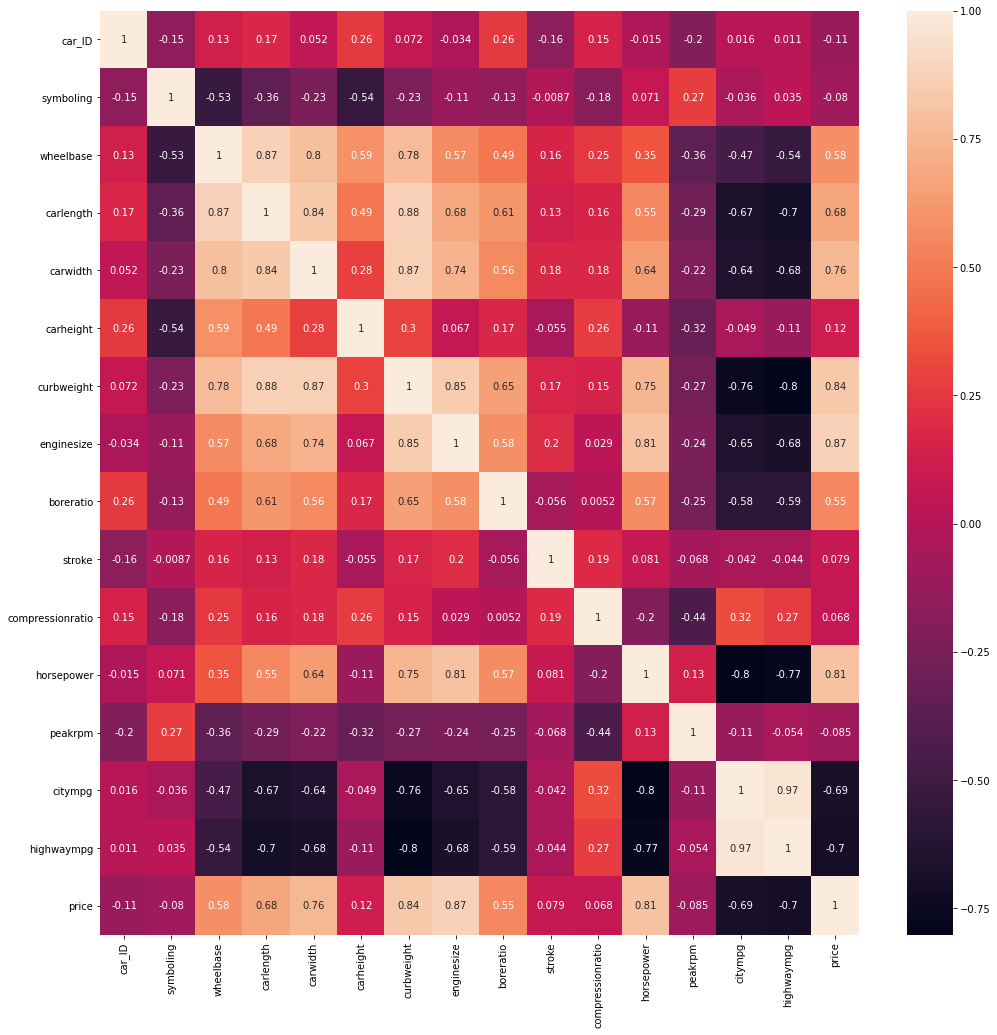

In [6]:
v = df.corr()
plt.figure(figsize = (17,17))
sns.heatmap(data = v, annot = True)

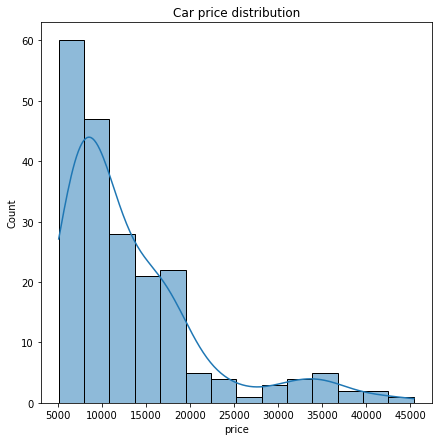

In [7]:
#checking 
plt.figure(figsize = (7, 7))
sns.histplot(df['price'], kde = True, ) 
plt.title("Car price distribution")
plt.show()

here, we can see the plot is right skewed which means the price value in the dataset are below 45,000

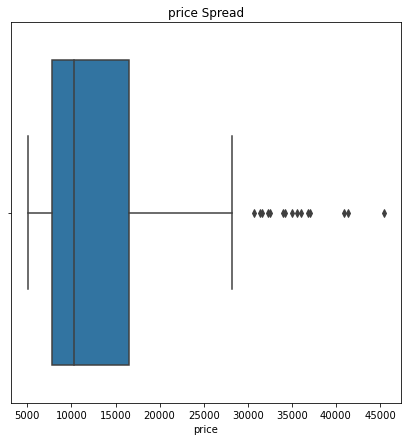

In [8]:
#seeing price spread
plt.figure(figsize = (7, 7))
sns.boxplot(x = df['price'])
plt.title("price Spread")
plt.show()

here we can see, the longer tail towards left side indicates that median is smaller. This shows the significance difference between mean and median distribution.

**understanding Categorical data **
*  Symboling
* companyname
* fueltype 
* aspiration
* doornumber
* carbody
* drivewheel 
* enginelocation
* enginetype
* cylindernumber
* fuelsystem

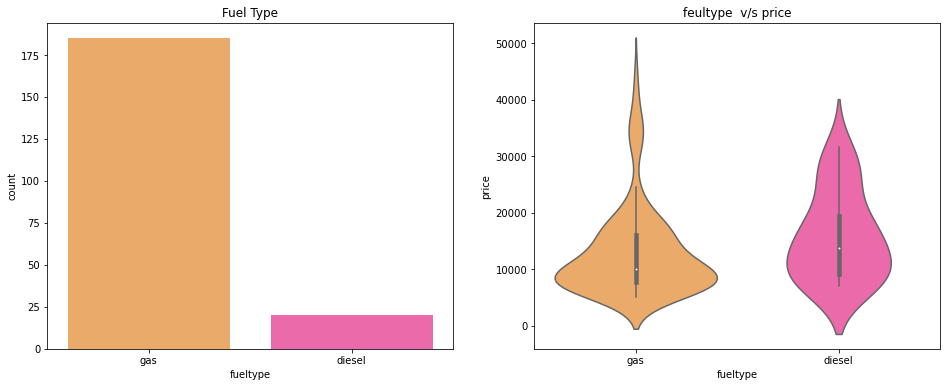

In [9]:
#countplot
plt.figure(figsize= (16, 6))
plt. subplot(1, 2, 1 )   #fuel type
sns.countplot(x = df['fueltype'], palette = 'spring_r')
plt.title('Fuel Type')

plt.subplot(1, 2, 2)
sns.violinplot(x = df['fueltype'], y = df['price'], palette = 'spring_r')
plt.title("feultype  v/s price")
plt.show()



TN FEULTYPE, THE DIESEL SEEMS TO HAVE HIGH PRICE THAN GAS.

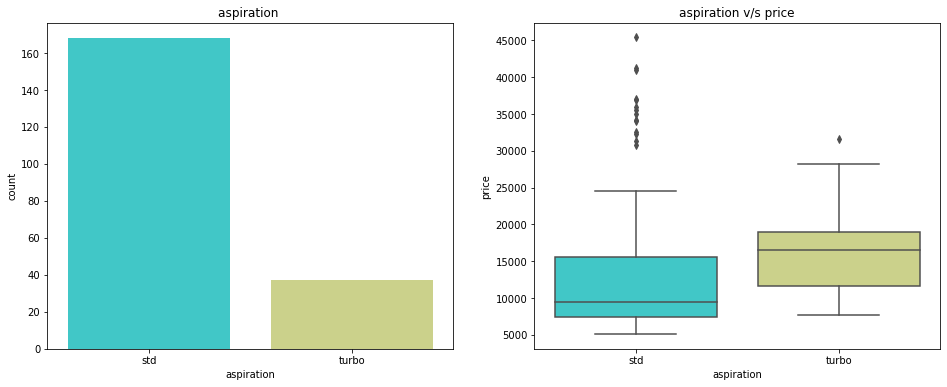

In [10]:
plt.figure(figsize= (16, 6))
plt. subplot(1, 2, 1 )   #aspiration
sns.countplot(x = df['aspiration'], palette = 'rainbow')
plt.title('aspiration ')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['aspiration'], y = df['price'], palette= 'rainbow')
plt.title("aspiration v/s price")
plt.show()

OVER HERE IN ASPIRATION , TURBO SEEMS TO HAVE HIGH PRICE THAN STD.

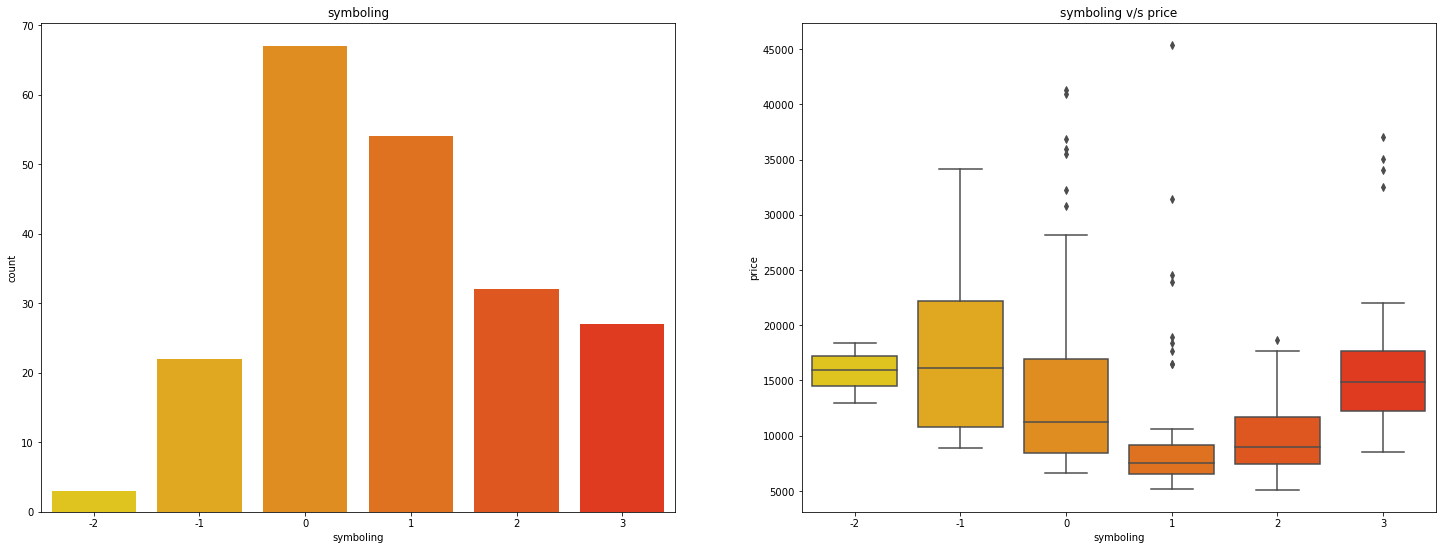

In [11]:
#symboling
plt.figure(figsize= (25, 9))
plt.subplot(1, 2, 1)
sns.countplot(x = df['symboling'], palette = "autumn_r")
plt.title('symboling')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['symboling'], y = df['price'], palette = 'autumn_r', )
plt.title("symboling v/s price")
plt.show()

* AS DEMONSTRATED, THE SYMBOLING OF [-1] SHOWS HIGH PRICE, WHEREAS SYMBOLING [0] AND [1] SHOWS THE LARGER IN NUMBER i.e THEY ARE MOST SOLD

* SYMBOLING [2] AND [3] SHOWS THEY HAVE A SIMILAR RANGE
* SYMBOLING [1] IS VERY LOW IN PRICE.

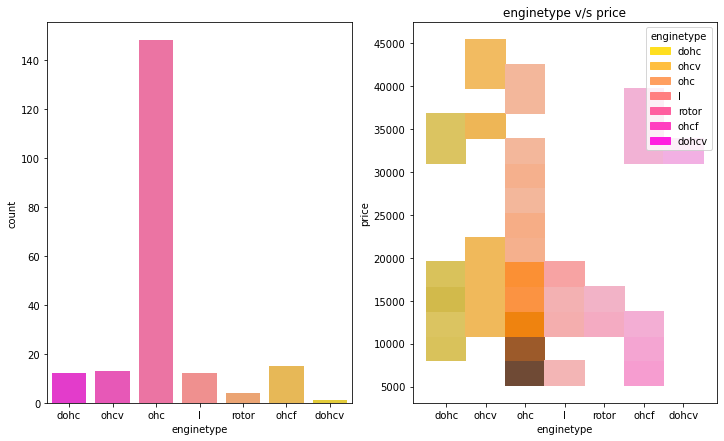

In [12]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['enginetype'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.histplot(x = df['enginetype'] , y = df['price'], hue = df["enginetype"], palette = 'spring_r')
plt.title('enginetype v/s price')
plt.show()

HERE, ohcv SEEMS TO BE HIGHLY PRICED, WHEAREAS ohc SEEMS TO BE HIGHLY FAVOURED.

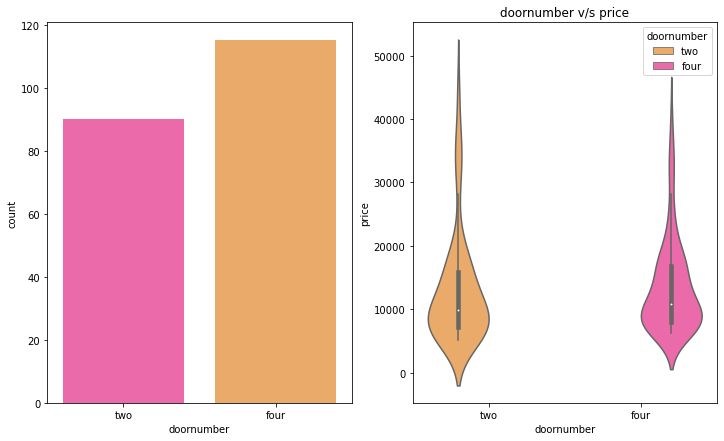

In [13]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['doornumber'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.violinplot(x = df['doornumber'] , y = df['price'], hue = df["doornumber"], palette = 'spring_r')
plt.title('doornumber v/s price')
plt.show()

HERE, THE PRICE FOR DOORNUMBER IS SUBTLE. DOOR NUMBER DOESN'T SEEMS TO BE MUCH AFFECTING.

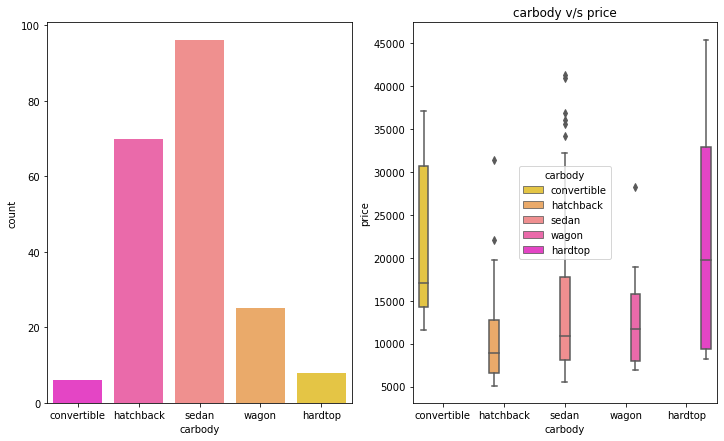

In [14]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['carbody'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['carbody'] , y = df['price'], hue = df["carbody"], palette = 'spring_r')
plt.title('carbody v/s price')
plt.show()

HERE, THE HARDTOP CARBODY HAS MORE PRICE. THE SEDAN IS THE MOST FAVOURED.

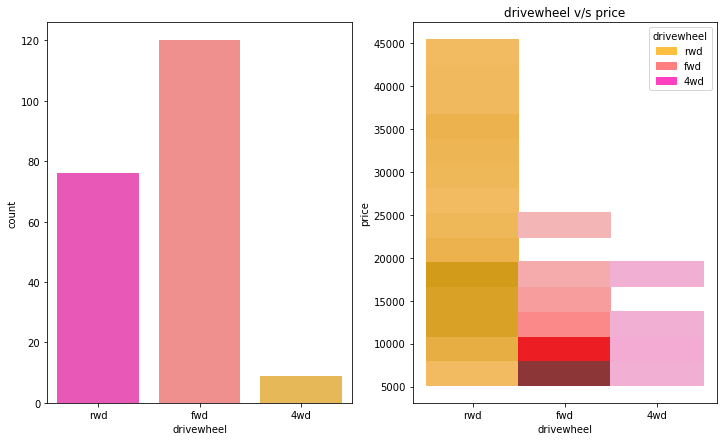

In [15]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['drivewheel'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.histplot(x = df['drivewheel'] , y = df['price'], hue = df["drivewheel"], palette = 'spring_r')
plt.title('drivewheel v/s price')
plt.show()

IN DRIVEWHEEL, rwd SEEMS TO HAVE HIGH PRICE.

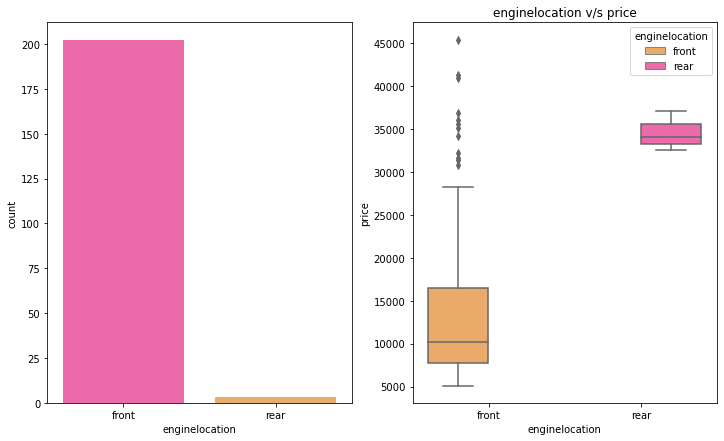

In [16]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['enginelocation'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['enginelocation'] , y = df['price'], hue = df["enginelocation"], palette = 'spring_r')
plt.title('enginelocation v/s price')
plt.show()

THE DATAPOINTS IN THE ENGINELOCATION SEEMS TO BE VERY LESS TO CONCLUDE.

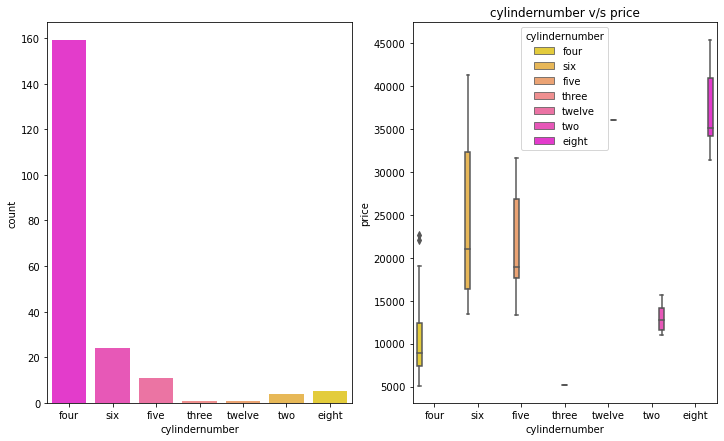

In [17]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['cylindernumber'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['cylindernumber'] , y = df['price'], hue = df["cylindernumber"], palette = 'spring_r')
plt.title('cylindernumber v/s price')
plt.show()

HERE, THE eight CYLINDER NUMBER SEEMS TO HAVE HIGHER PRICE.

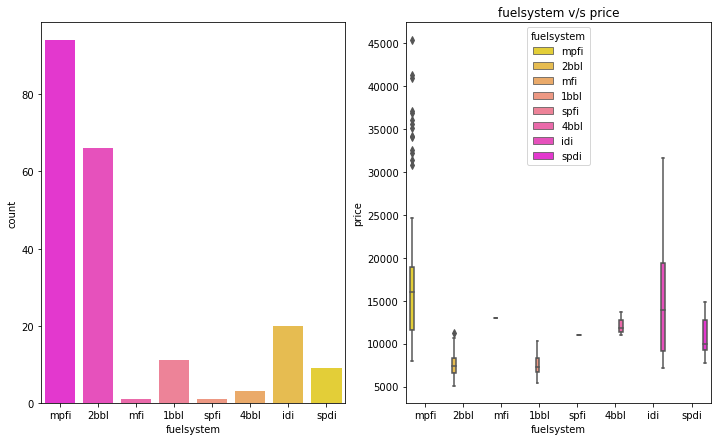

In [18]:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = df['fuelsystem'], palette = 'spring')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['fuelsystem'] , y = df['price'], hue = df["fuelsystem"], palette = 'spring_r')
plt.title('fuelsystem v/s price')
plt.show()

HERE THE mpfi AND idi HAVE HIGH PRICE, WHEREAS mpfi and 2bbl ARE THE MOST COMMON.

VISAULISING NUMERICAL DATA
* wheelbase
* carlength
* carwidth
* carheight
* curbweight
* enginesize
* boreratio
* stroke
* compressionratio
* horsepower
* citympg
* highwaympg
* peakrpm

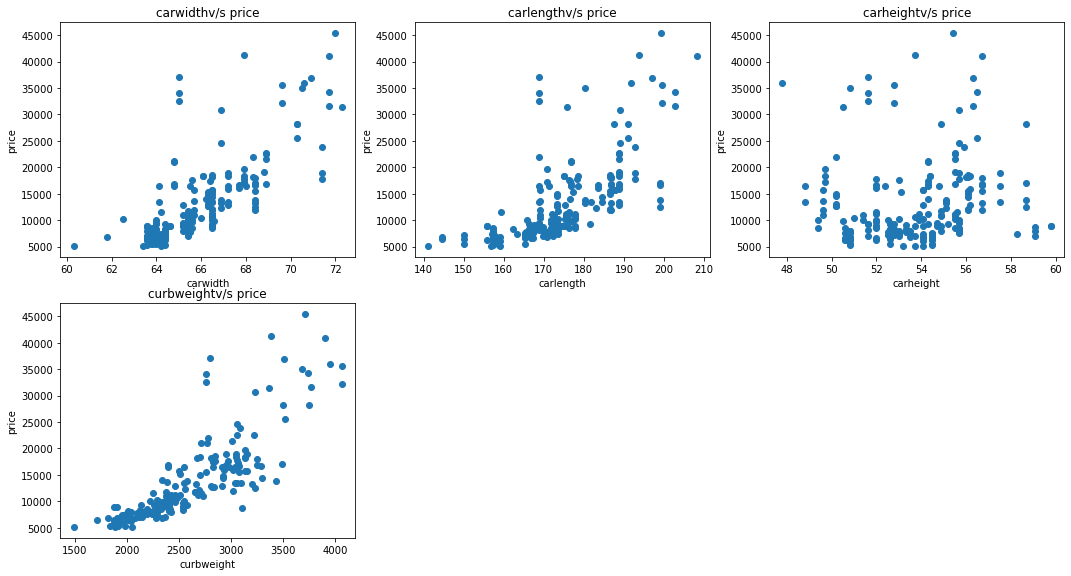

In [19]:
def numplot(x , fig):
    plt.subplot(5, 3, fig)
    plt.scatter(df[x], df['price'])
    plt.title(x + 'v/s price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(18, 25))

numplot('carwidth', 1)
numplot('carlength', 2)
numplot('carheight', 3)
numplot('curbweight', 4)

THE *carwidth, carlength, curbweight* HAVE POSITIVE CORRELATION WITH THE PRICE, WHEREAS *carheight* SHOWS NO CORRELATION WITH THE PRICE.

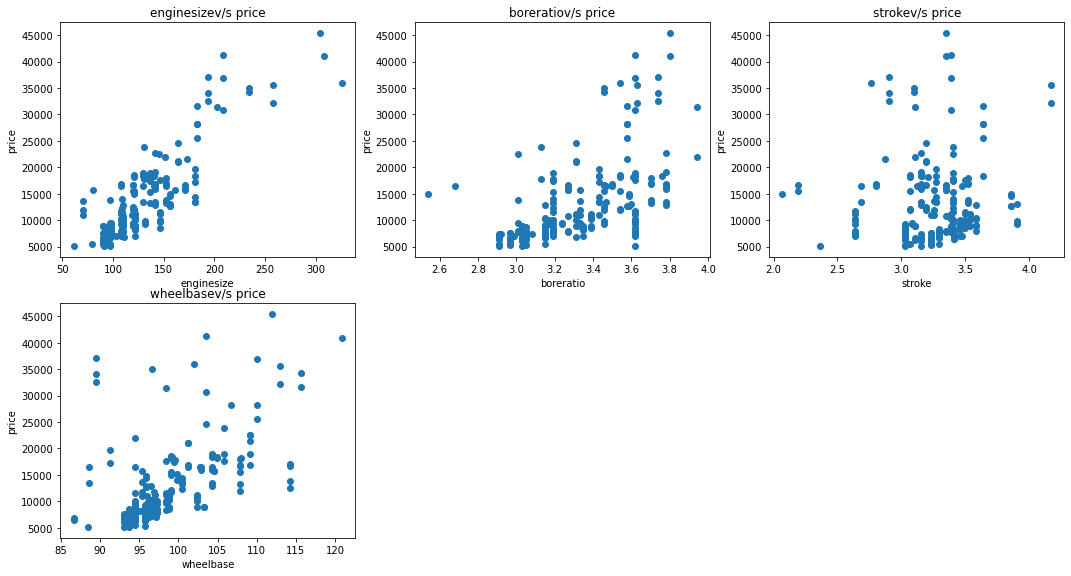

In [20]:
plt.figure(figsize = (18, 25))
numplot('enginesize', 1)
numplot('boreratio', 2)
numplot('stroke', 3)
numplot('wheelbase', 4)

HERE, *enginesize, boreratio, wheelbase* SHOW THE POSITIVE CORREALTION, WHEREAS *stroke* SHOWS NO CORRELATION WITH THE PRICE.  

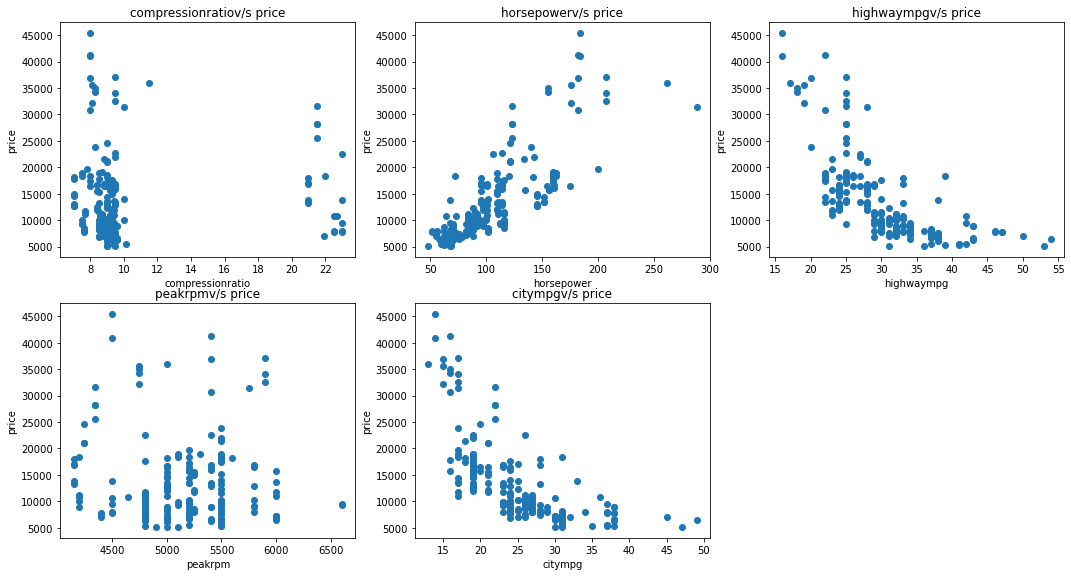

In [21]:
plt.figure(figsize = (18, 25))
numplot('compressionratio', 1)
numplot('horsepower', 2)
numplot('highwaympg', 3)
numplot('peakrpm', 4)
numplot('citympg', 5)

* HERE, *horsepower* SHOWS THE POSITIVE CORRELATION WITH THE PRICE
* *citympg, highwaympg* SHOWS THE NEGATIVE CORREALTION WITH THE PRICE
*  *peakrpm, compressionratio* DOES NOT SHOW ANY CORRELATION WITH THE PRICE.

In [22]:
#to calculate fuel economy, the average of the citympg and highwaympg are assuming 55% and 45% driving shares.
df['fueleconomy'] = (0.55 * df['citympg'] + 0.45 * df['highwaympg'])

In [23]:
df_copy = df.copy() #creating a copy of a dataframe
df['price'] = df['price'].astype('int') #converting data type into int

#companies based on avg 
table = df_copy.groupby(['companyname'])['price'].mean()
df_copy = df_copy.merge(table, how = 'left', on = 'companyname')
bins = [0, 10000,20000,40000]
df_bin = ['budget', 'medium', 'highend']
df['range'] = pd.cut(df_copy['price_y'], bins, right = False, labels = df_bin)
df.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,medium


SEEING CORRELATION BETWEEN FUEL ECONOMY AND PRICE

Text(0.5, 1.0, 'fuel economy v/s price')

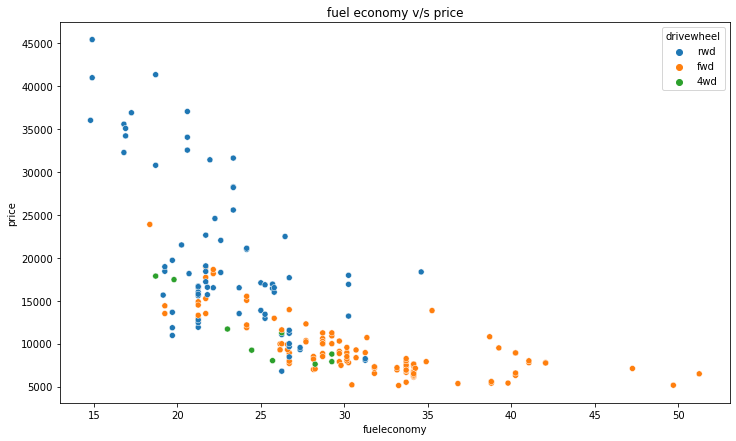

In [24]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.title('fuel economy v/s price')

THUS IT SHOWS NEGATIVE CORREALTION

VARIABLES WHICH ARE SIGNIFICANT AFTER ANALYSIS.
- car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [25]:
#collecting categorical columns
df1 =df[["price","range","curbweight","fueltype", "carlength", "carwidth", "aspiration", "carbody", "drivewheel", "enginetype", "cylindernumber", "enginesize", "boreratio", "horsepower", "wheelbase", "fueleconomy"]]
df1

,price,range,curbweight,fueltype,carlength,carwidth,aspiration,carbody,drivewheel,enginetype,cylindernumber,enginesize,boreratio,horsepower,wheelbase,fueleconomy
0,13495,medium,2548,gas,168.8,64.1,std,convertible,rwd,dohc,four,130,3.47,111,88.6,23.70
1,16500,medium,2548,gas,168.8,64.1,std,convertible,rwd,dohc,four,130,3.47,111,88.6,23.70
2,16500,medium,2823,gas,171.2,65.5,std,hatchback,rwd,ohcv,six,152,2.68,154,94.5,22.15
3,13950,medium,2337,gas,176.6,66.2,std,sedan,fwd,ohc,four,109,3.19,102,99.8,26.70
4,17450,medium,2824,gas,176.6,66.4,std,sedan,4wd,ohc,five,136,3.19,115,99.4,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,medium,2952,gas,188.8,68.9,std,sedan,rwd,ohc,four,141,3.78,114,109.1,25.25
201,19045,medium,3049,gas,188.8,68.8,turbo,sedan,rwd,ohc,four,141,3.78,160,109.1,21.70
202,21485,medium,3012,gas,188.8,68.9,std,sedan,rwd,ohcv,six,173,3.58,134,109.1,20.25
203,22470,highend,3217,diesel,188.8,68.9,turbo,sedan,rwd,ohc,six,145,3.01,106,109.1,26.45


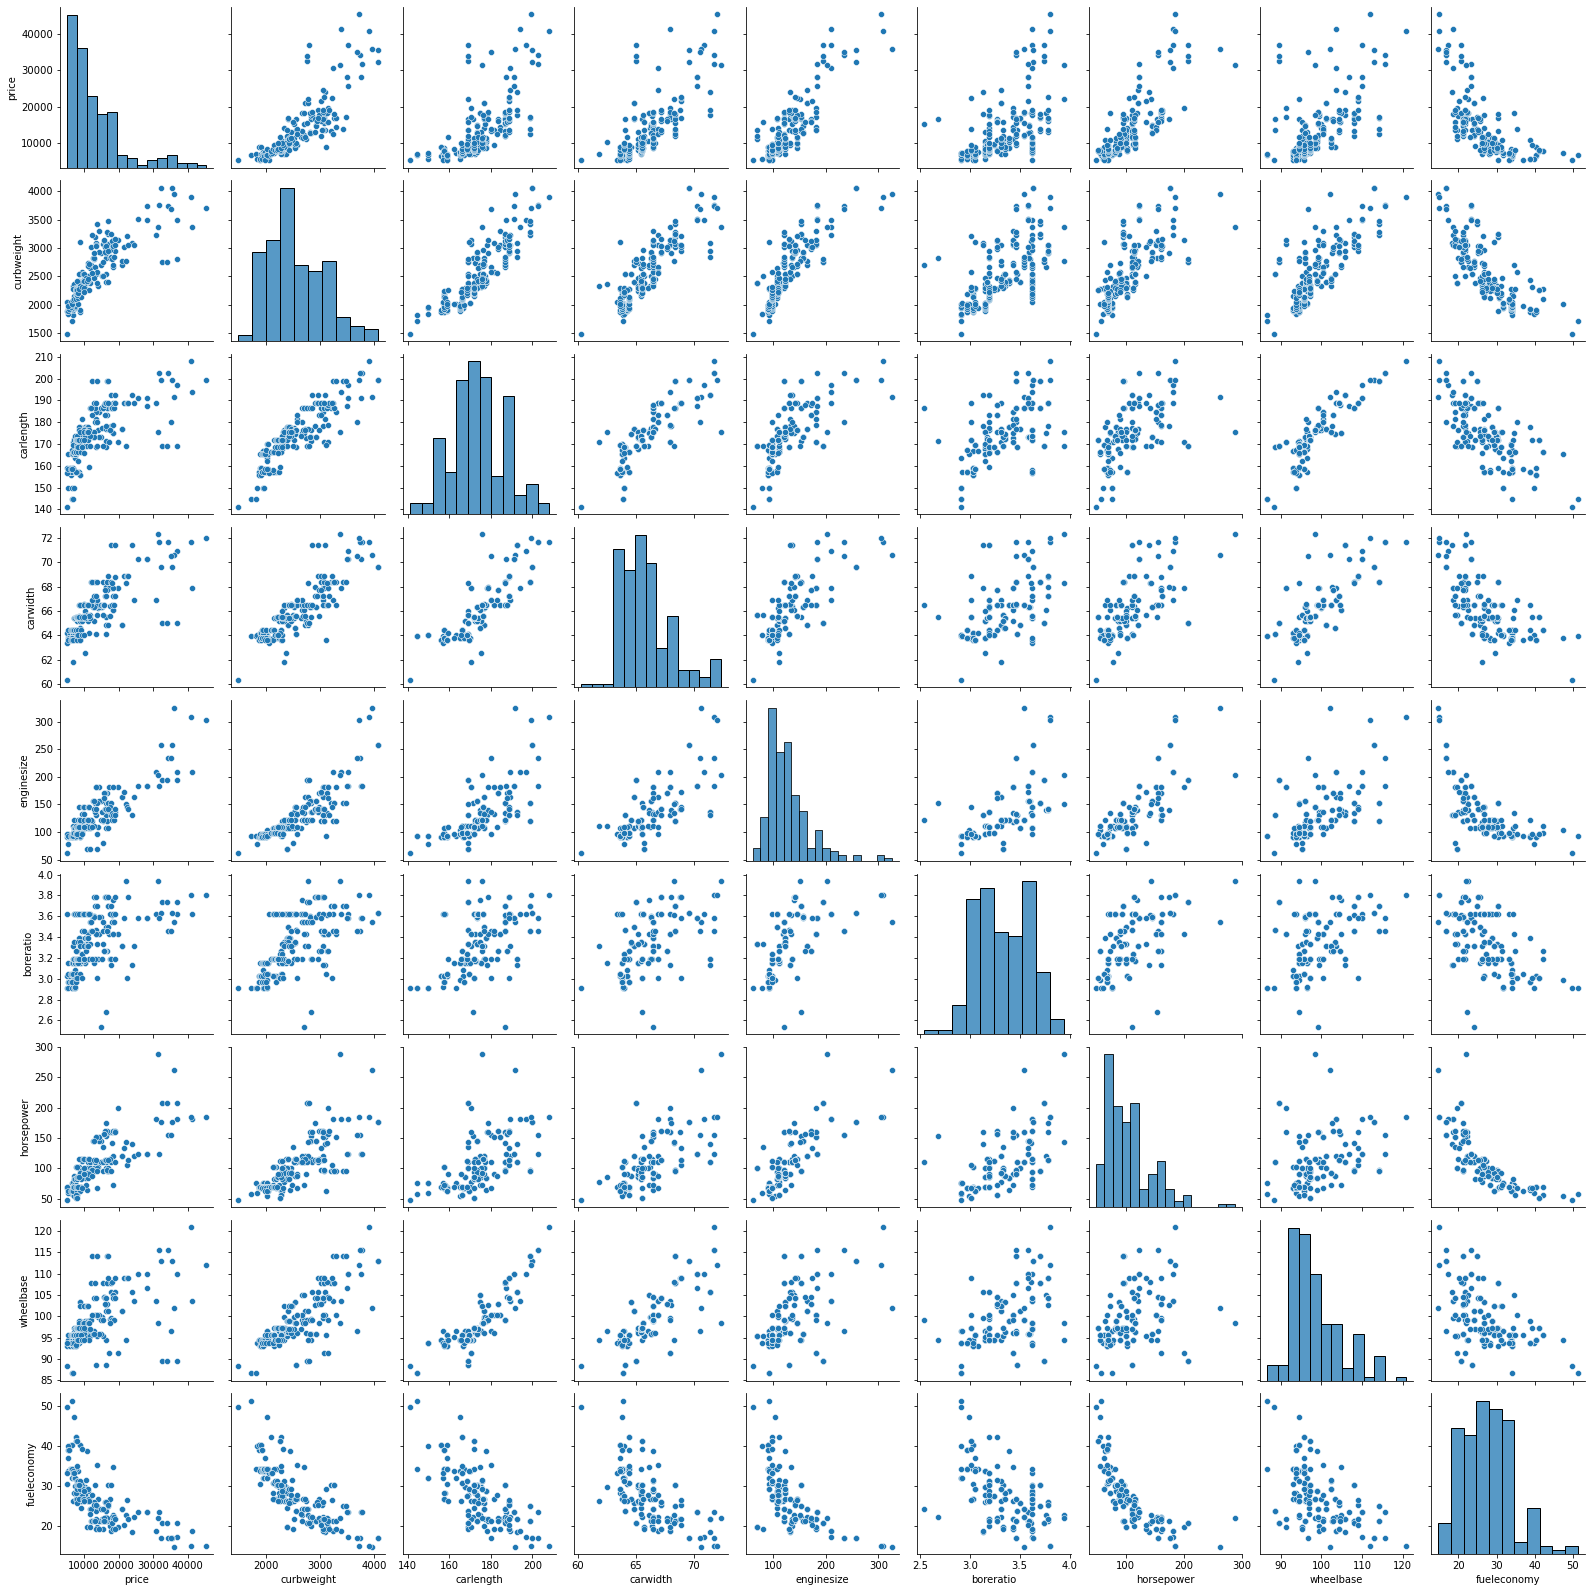

In [26]:
sns.pairplot(df1)

In [27]:
df1.shape

(205, 16)

In [28]:
#using get dummies for categorical encoding
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df1 = dummies('fueltype',df1)
df1 = dummies('aspiration',df1)
df1 = dummies('carbody',df1)
df1 = dummies('drivewheel',df1)
df1 = dummies('enginetype',df1)
df1 = dummies('cylindernumber',df1)
df1 = dummies('range',df1)



In [29]:
df1.head()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
0,13495,2548,168.8,64.1,130,3.47,111,88.6,23.70,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,2548,168.8,64.1,130,3.47,111,88.6,23.70,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,2823,171.2,65.5,152,2.68,154,94.5,22.15,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,2337,176.6,66.2,109,3.19,102,99.8,26.70,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,2824,176.6,66.4,136,3.19,115,99.4,19.80,1,...,0,0,1,0,0,0,0,0,1,0


In [30]:
df1.shape

(205, 31)

In [31]:
#train test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)



In [32]:
#feature scaling on numerical variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-32-318fb81ea309>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Zoe\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [33]:
df_train.head()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
122,0.068818,0.272692,0.426016,0.291667,0.139623,0.230159,0.083333,0.244828,0.530864,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.500388,0.452033,0.666667,0.339623,1.000000,0.395833,0.272414,0.213992,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.314973,0.448780,0.308333,0.139623,0.444444,0.266667,0.272414,0.344307,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.411171,0.450407,0.316667,0.260377,0.626984,0.262500,0.068966,0.244170,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.647401,0.775610,0.575000,0.260377,0.746032,0.475000,0.610345,0.122085,1,...,0,0,0,1,0,0,0,0,1,0


In [34]:
#dividing into features and labels
x_train = df1.iloc[:, 1:]
y_train = df1.iloc[:, 0] #price


# BUILDING MODEL

In [35]:
#RFE recursive feature elimination, it remove the weakest feature until the specified number of the features is reached.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)
rfe = RFE(lr, 15)
rfe.fit(x_train, y_train)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('curbweight', False, 16),
 ('carlength', False, 15),
 ('carwidth', False, 4),
 ('enginesize', False, 13),
 ('boreratio', False, 11),
 ('horsepower', False, 10),
 ('wheelbase', False, 9),
 ('fueleconomy', False, 12),
 ('gas', False, 7),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', False, 14),
 ('dohcv', True, 1),
 ('l', False, 8),
 ('ohc', False, 3),
 ('ohcf', False, 2),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', False, 5),
 ('two', True, 1),
 ('medium', False, 6),
 ('highend', True, 1)]

In [38]:
x_train.columns[rfe.support_]

Index(['turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'dohcv',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'two', 'highend'],
      dtype='object')

In [39]:
x_rfe = x_train[x_train.columns[rfe.support_]]

In [40]:
#calculating vif i.e Variation inflation Factor. This makes one input feature as output featur
#model 1

x = sm.add_constant(x_rfe) #adding constant
lm = sm.OLS(y_train, x_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                  -1.562
Model:                            OLS   Adj. R-squared (uncentered):             -1.750
Method:                 Least Squares   F-statistic:                             -8.318
Date:                Sun, 16 May 2021   Prob (F-statistic):                        1.00
Time:                        18:16:33   Log-Likelihood:                         -2032.2
No. Observations:                 205   AIC:                                      4092.
Df Residuals:                     191   BIC:                                      4139.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
turbo       1436.1623    996.896      1.441      0.151    -530.177    3402.502
hardtop     9225.7966   2537.671      3.636      0.000    4220.336    1.42e+04
hatchback   4690.5306   2081.981      2.253      0.025     583.903    8797.158
sedan       6554.9880   1985.090      3.302      0.001    2639.473    1.05e+04
wagon       5721.2971   2191.241      2.611      0.010    1399.157       1e+04
fwd        -4228.9099    879.922     -4.806      0.000   -5964.522   -2493.298
dohcv       1.332e+04   5591.795      2.382      0.018    2287.340    2.43e+04
ohcv        1.244e+04   1784.697      6.969      0.000    8917.499     1.6e+04
rotor       4164.7347   1638.729      2.541      0.012     932.404    7397.065
five        1.021e+04   2527.481      4.038      0.000    5219.741    1.52e+04
four        7044.6033   1988.926      3.542      0.000    3121.522     1.1e+04
six         7827.7681   1989.393      3.935      0.000    3903.765    1.18e+04
three       4689.3793   5490.572      0.854      0.394   -6140.565    1.55e+04
two         4164.7347   1638.729      2.541      0.012     932.404    7397.065
highend     1.339e+04   1421.740      9.420      0.000    1.06e+04    1.62e+04
==============================================================================
Omnibus:                      101.899   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.271
Skew:                           1.843   Prob(JB):                    2.73e-131
Kurtosis:                      10.537   Cond. No.                     2.19e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.71e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

removing three as this shows higher p value.

In [41]:
x_new = x_rfe.drop(['three'], axis = 1)

In [42]:
#model 2

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     51.81
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.00e-55
Time:                        18:16:33   Log-Likelihood:                -1977.7
No. Observations:                 205   AIC:                             3983.
Df Residuals:                     191   BIC:                             4030.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.206e+04   2757.077     11.630      0.000    2.66e+04    3.75e+04
turbo       2711.2177    771.957      3.512      0.001    1188.562    4233.874
hardtop    -1160.5404   2106.605     -0.551      0.582   -5315.739    2994.658
hatchback  -4929.5209   1733.719     -2.843      0.005   -8349.215   -1509.827
sedan      -3012.2348   1681.187     -1.792      0.075   -6328.312     303.842
wagon      -3789.4175   1817.348     -2.085      0.038   -7374.068    -204.767
fwd        -4176.7559    671.223     -6.223      0.000   -5500.717   -2852.795
dohcv      -2776.4834   4456.108     -0.623      0.534   -1.16e+04    6013.021
ohcv         508.3876   1679.979      0.303      0.763   -2805.306    3822.081
rotor      -7057.6681   1542.190     -4.576      0.000   -1.01e+04   -4015.758
five       -1.006e+04   2517.275     -3.995      0.000    -1.5e+04   -5090.512
four       -1.581e+04   2380.735     -6.641      0.000   -2.05e+04   -1.11e+04
six        -8217.0151   1987.785     -4.134      0.000   -1.21e+04   -4296.185
two        -7057.6681   1542.190     -4.576      0.000   -1.01e+04   -4015.758
highend     7041.1473   1217.849      5.782      0.000    4638.985    9443.309
==============================================================================
Omnibus:                       55.240   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.743
Skew:                           0.791   Prob(JB):                     1.73e-84
Kurtosis:                       9.531   Cond. No.                     8.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.63e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
#removing ohcv it has higher p value
x_new = x_new.drop(['ohcv'], axis = 1)

In [44]:
#model 3

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     56.38
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.72e-56
Time:                        18:16:33   Log-Likelihood:                -1977.8
No. Observations:                 205   AIC:                             3982.
Df Residuals:                     192   BIC:                             4025.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.256e+04   2206.386     14.759      0.000    2.82e+04    3.69e+04
turbo       2734.9811    766.134      3.570      0.000    1223.861    4246.101
hardtop    -1184.0988   2100.180     -0.564      0.574   -5326.487    2958.289
hatchback  -4938.8660   1729.338     -2.856      0.005   -8349.806   -1527.926
sedan      -3022.9864   1676.830     -1.803      0.073   -6330.361     284.388
wagon      -3798.8142   1812.779     -2.096      0.037   -7374.333    -223.295
fwd        -4174.8333    669.603     -6.235      0.000   -5495.556   -2854.111
dohcv      -3137.3436   4283.421     -0.732      0.465   -1.16e+04    5311.260
rotor      -7302.0884   1310.654     -5.571      0.000   -9887.219   -4716.958
five        -1.05e+04   2044.624     -5.134      0.000   -1.45e+04   -6465.240
four        -1.63e+04   1737.086     -9.385      0.000   -1.97e+04   -1.29e+04
six        -8478.3950   1786.080     -4.747      0.000    -1.2e+04   -4955.536
two        -7302.0884   1310.654     -5.571      0.000   -9887.219   -4716.958
highend     6913.1669   1139.355      6.068      0.000    4665.907    9160.427
==============================================================================
Omnibus:                       52.647   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.286
Skew:                           0.712   Prob(JB):                     6.55e-86
Kurtosis:                       9.626   Cond. No.                     1.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
#dropping hardtop
x_new = x_new.drop(['hardtop'], axis = 1)

In [46]:
#model 4

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     61.70
Date:                Sun, 16 May 2021   Prob (F-statistic):           3.94e-57
Time:                        18:16:33   Log-Likelihood:                -1977.9
No. Observations:                 205   AIC:                             3980.
Df Residuals:                     193   BIC:                             4020.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.191e+04   1869.884     17.063      0.000    2.82e+04    3.56e+04
turbo       2720.9691    764.376      3.560      0.000    1213.366    4228.573
hatchback  -4258.7600   1236.968     -3.443      0.001   -6698.472   -1819.048
sedan      -2341.3629   1159.912     -2.019      0.045   -4629.094     -53.632
wagon      -3116.4846   1347.260     -2.313      0.022   -5773.727    -459.242
fwd        -4177.4336    668.403     -6.250      0.000   -5495.745   -2859.122
dohcv      -3172.6232   4275.388     -0.742      0.459   -1.16e+04    5259.860
rotor      -7313.4755   1308.181     -5.591      0.000   -9893.642   -4733.309
five       -1.056e+04   2037.575     -5.185      0.000   -1.46e+04   -6546.094
four       -1.632e+04   1733.805     -9.411      0.000   -1.97e+04   -1.29e+04
six        -8520.0770   1781.393     -4.783      0.000    -1.2e+04   -5006.578
two        -7313.4755   1308.181     -5.591      0.000   -9893.642   -4733.309
highend     6925.6722   1137.124      6.091      0.000    4682.886    9168.459
==============================================================================
Omnibus:                       50.957   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.856
Skew:                           0.676   Prob(JB):                     5.40e-83
Kurtosis:                       9.521   Cond. No.                     4.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#dropping dohcv
x_new = x_new.drop(['dohcv'], axis = 1)

In [48]:
#model 5

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     67.97
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.10e-58
Time:                        18:16:33   Log-Likelihood:                -1978.2
No. Observations:                 205   AIC:                             3978.
Df Residuals:                     194   BIC:                             4015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.16e+04   1821.479     17.348      0.000     2.8e+04    3.52e+04
turbo       2750.3563    762.465      3.607      0.000    1246.571    4254.142
hatchback  -4399.7666   1220.870     -3.604      0.000   -6807.649   -1991.884
sedan      -2418.7020   1153.882     -2.096      0.037   -4694.465    -142.939
wagon      -3216.7060   1338.920     -2.402      0.017   -5857.414    -575.998
fwd        -4159.0522    667.170     -6.234      0.000   -5474.889   -2843.215
rotor      -7089.5526   1271.428     -5.576      0.000   -9597.148   -4581.957
five       -1.014e+04   1954.013     -5.190      0.000    -1.4e+04   -6288.196
four       -1.593e+04   1650.129     -9.652      0.000   -1.92e+04   -1.27e+04
six        -8071.8630   1673.927     -4.822      0.000   -1.14e+04   -4770.431
two        -7089.5526   1271.428     -5.576      0.000   -9597.148   -4581.957
highend     6793.3971   1121.765      6.056      0.000    4580.977    9005.818
==============================================================================
Omnibus:                       52.372   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.651
Skew:                           0.738   Prob(JB):                     1.32e-78
Kurtosis:                       9.309   Cond. No.                     1.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [50]:
VIF(x_new)

C:\Users\Zoe\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,rotor,inf
10,two,inf
0,const,45.641251
8,four,6.519168
2,hatchback,4.610755
3,sedan,4.560596
9,six,3.984413
7,five,2.667171
4,wagon,2.640724
11,highend,1.724266


In [51]:
#dropping sedan
x_new = x_new.drop(['sedan'], axis = 1)

In [52]:
#model 6

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     73.75
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.90e-58
Time:                        18:16:33   Log-Likelihood:                -1980.5
No. Observations:                 205   AIC:                             3981.
Df Residuals:                     195   BIC:                             4014.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.986e+04   1635.412     18.258      0.000    2.66e+04    3.31e+04
turbo       2555.7197    763.347      3.348      0.001    1050.243    4061.196
hatchback  -2201.4806    630.470     -3.492      0.001   -3444.895    -958.066
wagon      -1085.9890    879.013     -1.235      0.218   -2819.583     647.605
fwd        -4438.5740    659.371     -6.732      0.000   -5738.988   -3138.160
rotor      -7318.7530   1277.693     -5.728      0.000   -9838.623   -4798.883
five       -1.039e+04   1967.417     -5.279      0.000   -1.43e+04   -6506.795
four       -1.614e+04   1661.261     -9.716      0.000   -1.94e+04   -1.29e+04
six        -8410.4381   1680.552     -5.005      0.000   -1.17e+04   -5096.046
two        -7318.7530   1277.693     -5.728      0.000   -9838.623   -4798.883
highend     6994.9073   1127.322      6.205      0.000    4771.599    9218.216
==============================================================================
Omnibus:                       52.447   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.585
Skew:                           0.748   Prob(JB):                     4.51e-77
Kurtosis:                       9.239   Cond. No.                     9.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
#dropping wagon
x_new = x_new.drop(['wagon'], axis = 1)

In [54]:
#model 7

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     82.55
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.33e-58
Time:                        18:16:33   Log-Likelihood:                -1981.3
No. Observations:                 205   AIC:                             3981.
Df Residuals:                     196   BIC:                             4011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.968e+04   1631.099     18.196      0.000    2.65e+04    3.29e+04
turbo       2544.6260    764.319      3.329      0.001    1037.282    4051.971
hatchback  -1996.3000    609.019     -3.278      0.001   -3197.371    -795.229
fwd        -4350.5679    656.392     -6.628      0.000   -5645.065   -3056.071
rotor      -7331.3739   1279.366     -5.730      0.000   -9854.465   -4808.283
five       -1.054e+04   1965.963     -5.363      0.000   -1.44e+04   -6666.405
four       -1.624e+04   1661.512     -9.774      0.000   -1.95e+04    -1.3e+04
six        -8469.5911   1682.124     -5.035      0.000   -1.18e+04   -5152.205
two        -7331.3739   1279.366     -5.730      0.000   -9854.465   -4808.283
highend     7185.2085   1118.248      6.425      0.000    4979.866    9390.551
==============================================================================
Omnibus:                       54.339   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.940
Skew:                           0.778   Prob(JB):                     6.31e-82
Kurtosis:                       9.431   Cond. No.                     2.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#model 11
x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     82.55
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.33e-58
Time:                        18:16:34   Log-Likelihood:                -1981.3
No. Observations:                 205   AIC:                             3981.
Df Residuals:                     196   BIC:                             4011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.968e+04   1631.099     18.196      0.000    2.65e+04    3.29e+04
turbo       2544.6260    764.319      3.329      0.001    1037.282    4051.971
hatchback  -1996.3000    609.019     -3.278      0.001   -3197.371    -795.229
fwd        -4350.5679    656.392     -6.628      0.000   -5645.065   -3056.071
rotor      -7331.3739   1279.366     -5.730      0.000   -9854.465   -4808.283
five       -1.054e+04   1965.963     -5.363      0.000   -1.44e+04   -6666.405
four       -1.624e+04   1661.512     -9.774      0.000   -1.95e+04    -1.3e+04
six        -8469.5911   1682.124     -5.035      0.000   -1.18e+04   -5152.205
two        -7331.3739   1279.366     -5.730      0.000   -9854.465   -4808.283
highend     7185.2085   1118.248      6.425      0.000    4979.866    9390.551
==============================================================================
Omnibus:                       54.339   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.940
Skew:                           0.778   Prob(JB):                     6.31e-82
Kurtosis:                       9.431   Cond. No.                     2.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
#dropping rotor to see changes in modl
x_new = x_new.drop(['rotor'], axis = 1)

In [57]:
#model 8

x_new = sm.add_constant(x_new) #adding constant
lm = sm.OLS(y_train, x_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     82.55
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.33e-58
Time:                        18:16:34   Log-Likelihood:                -1981.3
No. Observations:                 205   AIC:                             3981.
Df Residuals:                     196   BIC:                             4011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.968e+04   1631.099     18.196      0.000    2.65e+04    3.29e+04
turbo       2544.6260    764.319      3.329      0.001    1037.282    4051.971
hatchback  -1996.3000    609.019     -3.278      0.001   -3197.371    -795.229
fwd        -4350.5679    656.392     -6.628      0.000   -5645.065   -3056.071
five       -1.054e+04   1965.963     -5.363      0.000   -1.44e+04   -6666.405
four       -1.624e+04   1661.512     -9.774      0.000   -1.95e+04    -1.3e+04
six        -8469.5911   1682.124     -5.035      0.000   -1.18e+04   -5152.205
two        -1.466e+04   2558.732     -5.730      0.000   -1.97e+04   -9616.566
highend     7185.2085   1118.248      6.425      0.000    4979.866    9390.551
==============================================================================
Omnibus:                       54.339   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.940
Skew:                           0.778   Prob(JB):                     6.31e-82
Kurtosis:                       9.431   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
VIF(x_new)

,Features,VIF
0,const,35.876621
5,four,6.478959
6,six,3.944110
4,five,2.646601
7,two,1.689075
8,highend,1.679648
3,fwd,1.410163
1,turbo,1.165207
2,hatchback,1.124700


RESIDUAL ANAALYSIS OF THE MODEL

In [59]:
 #adding constant
lm = sm.OLS(y_train, x_new).fit()
y_train_price =lm.predict(x_new)

C:\Users\Zoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


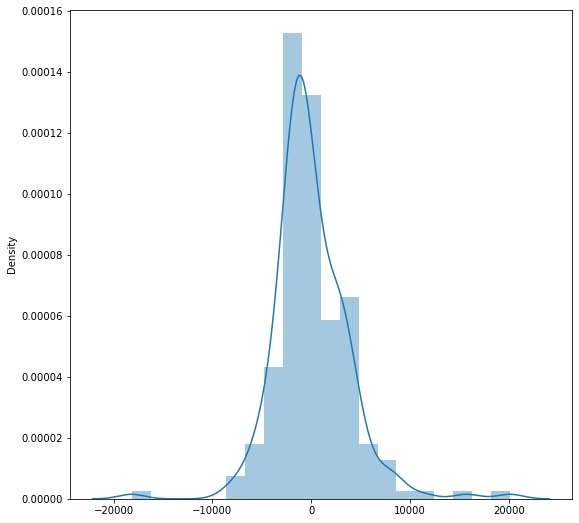

In [60]:
#plotting histogram
plt.figure(figsize = (9, 9))
sns.distplot((y_train - y_train_price), bins = 20)
plt.show()

here, this histogram shows that the data is normally distributed.

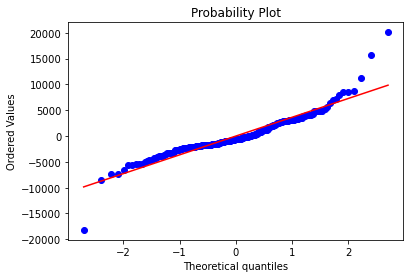

In [61]:
#using probplot lot
import pylab
import scipy.stats as st
st.probplot(y_train - y_train_price, dist = 'norm', plot = pylab)
plt.show()

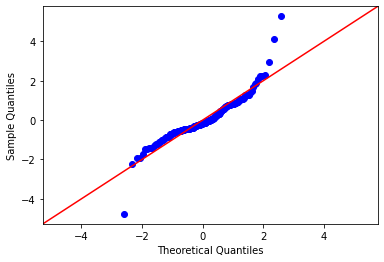

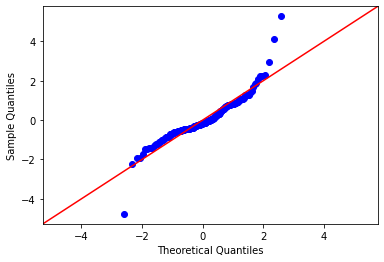

In [62]:
#qq plot
from statsmodels.graphics.gofplots import qqplot
qqplot(y_train - y_train_price, fit = True, line = '45')

- QQ plots helps you to check that the data meets the assumptions of normality, if your data distribution is normal then it will fall approximately on the straight line.
- As it shows the data points approximately falls on the straight line.

WORKING ON THE TEST SET

In [63]:
#scaling testing data
#feature scaling on numerical variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-63-b28c8fbb3788>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Zoe\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [64]:
x_test = df1.iloc[:, 1:]
y_test = df1.iloc[:, 0] #price


In [65]:
x_new

,const,turbo,hatchback,fwd,five,four,six,two,highend
0,1.0,0,0,0,0,1,0,0,0
1,1.0,0,0,0,0,1,0,0,0
2,1.0,0,1,0,0,0,1,0,0
3,1.0,0,0,1,0,1,0,0,0
4,1.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
200,1.0,0,0,0,0,1,0,0,0
201,1.0,1,0,0,0,1,0,0,0
202,1.0,0,0,0,0,0,1,0,0
203,1.0,1,0,0,0,0,1,0,1


In [66]:
#dropping constant column
x_new = x_new.drop(['const'], axis = 1)

In [67]:
#using model for prediction

x_test_new = x_test[x_new.columns] #creating new x_test new dataframe

x_test_new

,turbo,hatchback,fwd,five,four,six,two,highend
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
200,0,0,0,0,1,0,0,0
201,1,0,0,0,1,0,0,0
202,0,0,0,0,0,1,0,0
203,1,0,0,0,0,1,0,1


In [68]:
#adding constant
#adding a constant variable
x_test_new = sm.add_constant(x_test_new)

In [69]:
#making predictions
x_test_new

,const,turbo,hatchback,fwd,five,four,six,two,highend
0,1.0,0,0,0,0,1,0,0,0
1,1.0,0,0,0,0,1,0,0,0
2,1.0,0,1,0,0,0,1,0,0
3,1.0,0,0,1,0,1,0,0,0
4,1.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
200,1.0,0,0,0,0,1,0,0,0
201,1.0,1,0,0,0,1,0,0,0
202,1.0,0,0,0,0,0,1,0,0
203,1.0,1,0,0,0,0,1,0,1


In [70]:
#precicting using model
y_pred = lm.predict(x_test_new)

In [71]:
#evaluation test, comaparing y_pred and y_test
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.7032269513835266

Text(0, 0.5, 'y_pred')

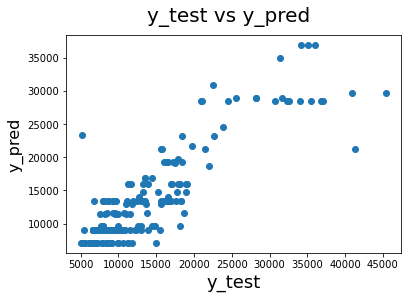

In [72]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     82.55
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.33e-58
Time:                        18:16:36   Log-Likelihood:                -1981.3
No. Observations:                 205   AIC:                             3981.
Df Residuals:                     196   BIC:                             4011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.968e+04   1631.099     18.196      0.0

-  p values of all the features are less than the significant value viz is 0.05. which means that the all the predictors are statiscally significant.

- here the *r- squared value*  and the *adjusted adj r- squared* value is 0.771 and 0.762 which seems to be moderate.
